<a href="https://colab.research.google.com/github/alpellario/E-Commerce-Revenue-Prediction-Linear-Regression/blob/main/%5BEN%5D_E_Commerce_Data_Linear_Regression_Analysis_Customer_Behavior_%26_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://i.hizliresim.com/3rdzxpx.png" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>



# E-commerce Data Through Linear Regression Analysis: Understanding Customer Behavior and Revenue Prediction

In this Jupyter Notebook, I present a comprehensive analysis of customer behaviors for an e-commerce company. In the project, I have examined and interpreted data on various features such as app and website usage times, membership durations, and annual expenditures of customers. Throughout the analysis process, I utilized data visualization techniques and a linear regression model trained with this data to make significant inferences. The model and analysis process play a crucial role in understanding the impacts of customer behaviors on annual expenditures and provide valuable insights for the company in deciding which strategies to prioritize.


## Imports


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Get the Data

* **Avg. Session Length:** The average duration of in-store style advice sessions.
* **Time on App:** The average minutes a customer spends on the app.
* **Time on Website:** The average minutes a customer spends on the website.
* **Length of Membership:** How many years a customer has been a member.
* **Yearly Amount Spent:** The amount a customer spends annually.

In [ ]:
ECOM = pd.read_csv('Ecommerce Customers')

In [ ]:
ECOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
ECOM.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
ECOM.describe().round(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


- **count:** The total number of measurements in the dataset. Indicates that there are 500 observations for each variable.
- **mean:** The arithmetic average of the observations. For example, the average for "Avg. Session Length" is 33.05 minutes.
- **std (standard deviation):** A measure of the spread of observations around the mean. A larger standard deviation indicates that the data are spread out over a wider range from the mean. For instance, the standard deviation for "Time on App" is 0.99, which shows that the values are spread around the average by about one minute.
- **min (minimum):** The lowest value of the observations. The minimum time for "Time on Website" is 33.91 minutes.
- **25% (1st quartile):** The value below which 25% of the observations fall. In other words, 25% of the data are less than this value. For example, the 25th percentile for "Length of Membership" is 2.93 years, meaning 25% of customers have been members for 2.93 years or less.
- **50% (median):** The value below and above which half of the observations fall. This is the midpoint of the data set and should not be confused with the average. The median for "Yearly Amount Spent" is 498.89 dollars, meaning half of the customers spend less than 498.89 dollars a year, and the other half spend more.
- **75% (3rd quartile):** The value below which 75% of the observations fall. In other words, 75% of the data are less than this value. The 75th percentile for "Avg. Session Length" is 33.71 minutes, meaning 75% of customers have sessions of 33.71 minutes or shorter.
- **max (maximum):** The highest value of the observations. The maximum expenditure for "Yearly Amount Spent" is 765.52 dollars.

## Exploratory Data Analysis


In [ ]:
sns.set_style('whitegrid')

(33.0, 41.0)

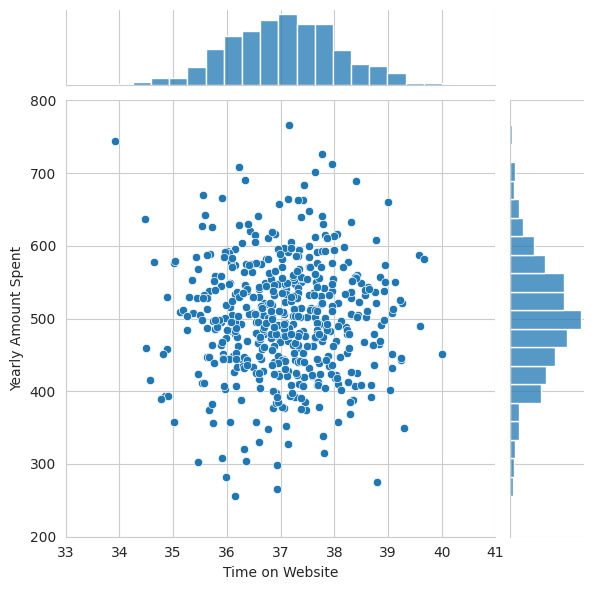

In [ ]:
sns.jointplot(data=ECOM, x='Time on Website', y='Yearly Amount Spent')
plt.ylim(200,800) #Yearly Spent max min
plt.xlim(33,41) #Time on Website max min

Looking at the scatter plot, we cannot observe a clear linear relationship between "Time on Website" and "Yearly Amount Spent". The points appear to be quite randomly distributed throughout the graph, with no apparent trend or pattern. This situation indicates that there is no strong linear correlation between these two variables.

(8.0, 16.0)

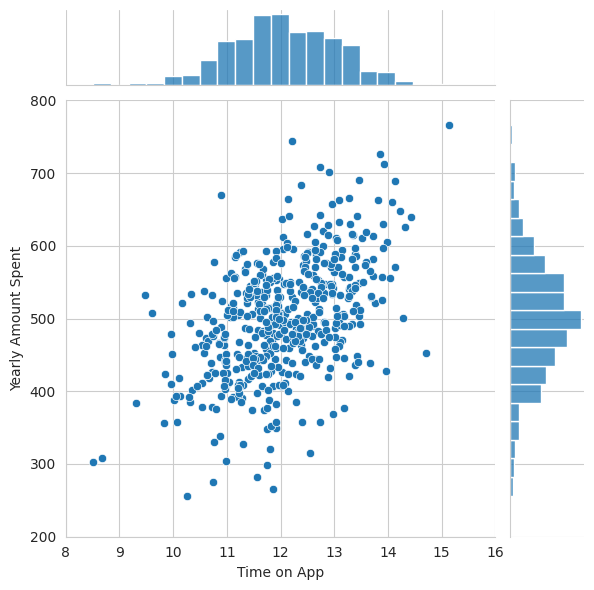

In [ ]:
sns.jointplot(data=ECOM, x='Time on App', y='Yearly Amount Spent')
plt.ylim(200,800)
plt.xlim(8,16)

In this graph, a positive relationship between "Time on App" and "Yearly Amount Spent" can be observed. The points show an upward trend; that is, as the time spent on the app increases, the amount of money spent annually also appears to increase.

Comparing the two graphs, it can be concluded that the use of "Time on App" has a stronger relationship with annual spending compared to "Time on Website" usage. This means that app usage is a more effective driver of sales or revenue than website usage.

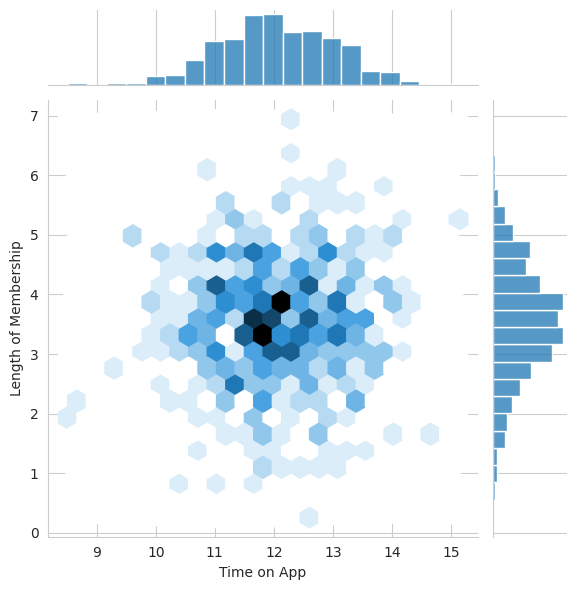

In [ ]:
sns.jointplot(data=ECOM, x='Time on App', y='Length of Membership', kind='hex')

The hex plot is used to display densities in large datasets, where each hexagon represents the number of observations falling within it through color intensity: darker colors indicate higher density (more observations), while lighter colors represent lower density (fewer observations).

In this graph, there is a trend suggesting a moderate positive correlation between the time spent on the app and the length of membership. The densest area is concentrated around spending approximately 12 minutes on the app and having a membership duration of about 3-4 years. This could help in identifying the most typical customer profile.

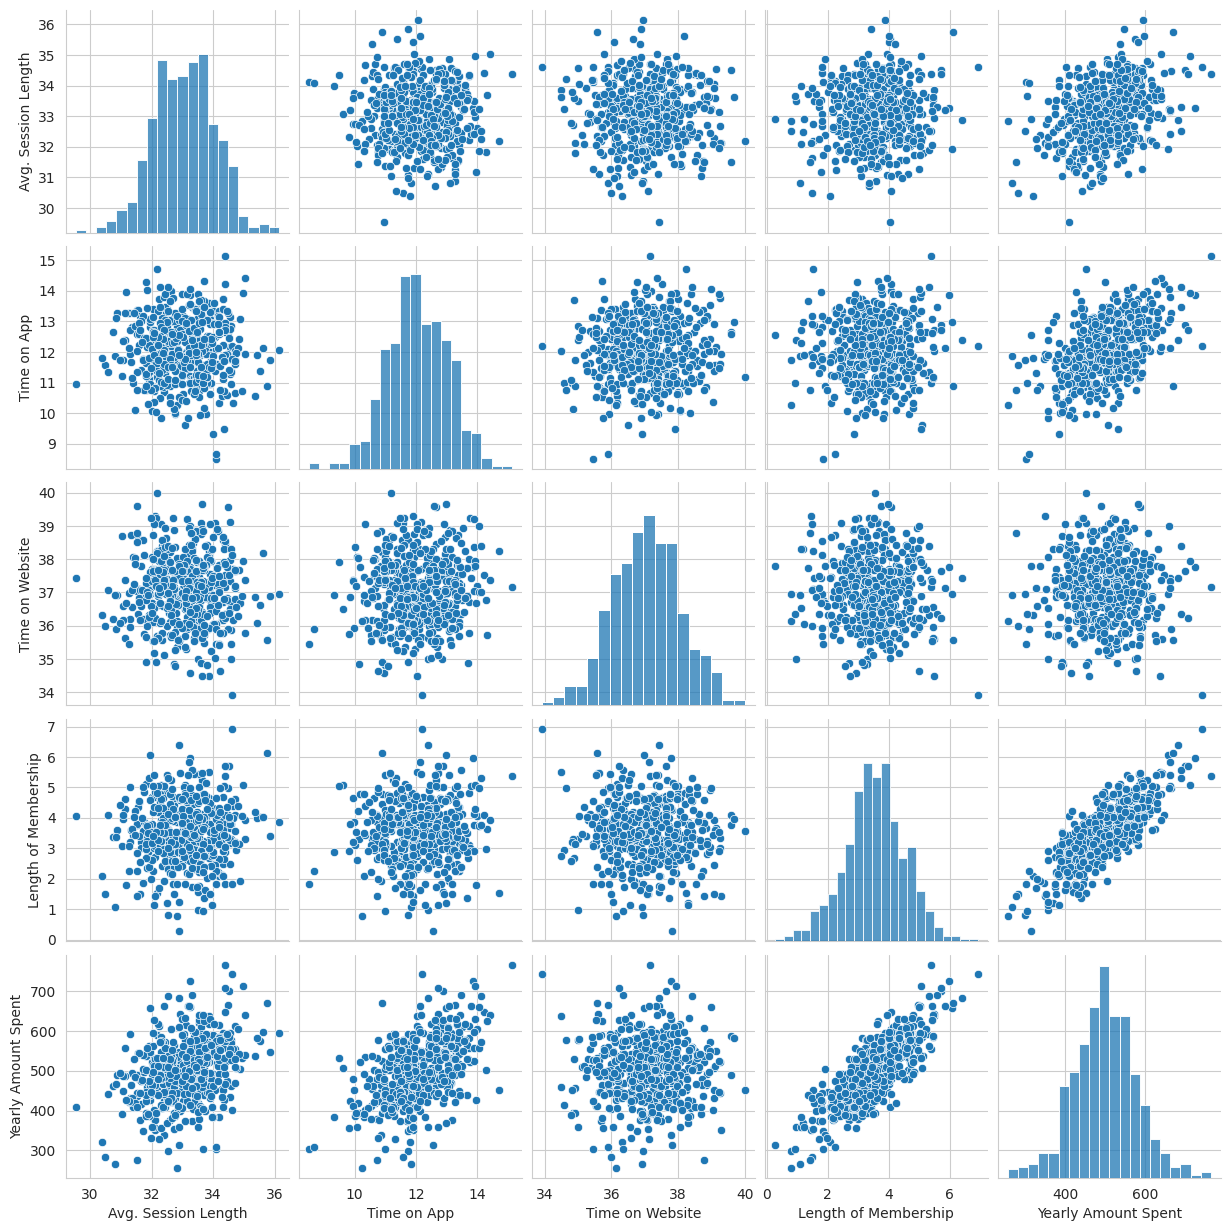

In [ ]:
sns.pairplot(ECOM)

In addition to the moderate positive relationship between "Yearly Amount Spent" and "Time on App" mentioned earlier, the graph also prominently shows a **strong and positive linear relationship** between **"Yearly Amount Spent"** and **"Length of Membership."** This indicates that the longer customers are members of the platform, the more money they spend annually. I will take a closer look at this.

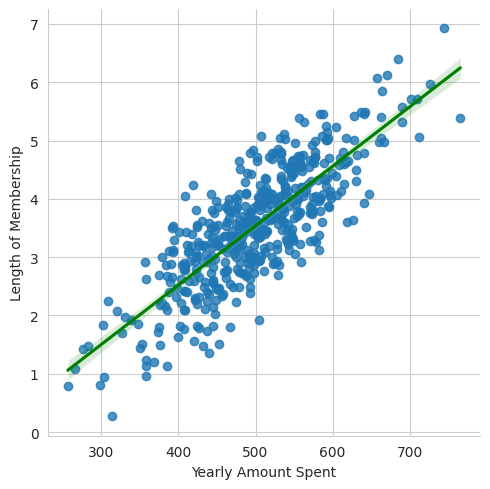

In [ ]:
sns.lmplot(data=ECOM, x='Yearly Amount Spent', y='Length of Membership', line_kws = { 'color': 'green'})

## Training and Testing Data


In [ ]:
ECOM.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
X = ECOM[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = ECOM['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(f"Train length= {len(X_train)}\nTest length: {len(X_test)}")

Train length= 350
Test length: 150


## Training the Model


In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

In [ ]:
print(f'Coefficients: {linear_model.coef_}')

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
pd.DataFrame(data=linear_model.coef_, index= X.columns,  columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The coefficients shown in the table are results of a regression model and indicate the average effect of each independent variable on the target variable. The coefficients represent the average impact on the target variable for each unit increase in the independent variables, holding all other factors constant.

1. **Avg. Session Length:** An increase of one minute in average session length is associated with an average increase of 25.98 units in annual spending.
2. **Time on App:** Each additional minute spent on the app is associated with an average increase of 38.59 units in annual spending.
3. **Time on Website:** Each additional minute spent on the website is associated with a very small increase of 0.19 units in annual spending.
4. **Length of Membership:** Each additional year of membership is associated with an average increase of 61.27 units in annual spending.

#### - **Importance of Membership Duration:**
The "Length of Membership" coefficient is significantly higher than the others, indicating that the longer a customer remains a member of the platform, the more they tend to spend annually.

#### - **App vs. Website:**
The "Time on App" coefficient is significantly higher than the "Time on Website" coefficient. This shows that time spent on the app increases annual spending more than time spent on the website.

#### - **Low Impact of Time on Website:**
The very low coefficient for "Time on Website" might suggest that this variable does not have a significant impact on annual spending.

## Predicting Test Data


In [ ]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predictions')

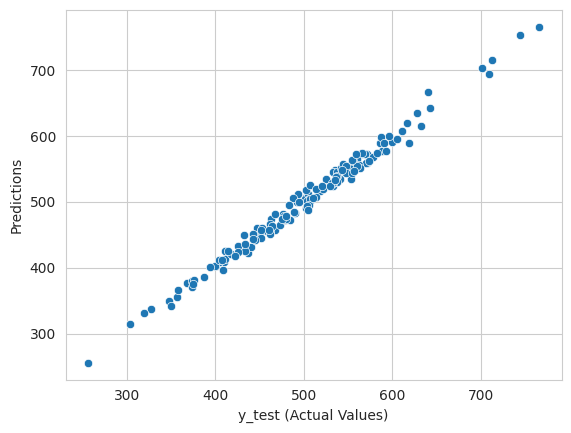

In [ ]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('y_test (Actual Values)')
plt.ylabel('Predictions')

The points forming a tight cluster around the diagonal line indicate a strong positive correlation between the model's predictions and the actual values. This suggests that the model's predictions are quite close to the real values. There may be some deviation at higher values, but overall, the model appears to predict variable values with good accuracy.

## Evaluating the Model

Various metrics are used to evaluate the performance of regression models. These metrics show how close the model's predictions are to the actual values.

**1. Mean Absolute Error (MAE):** Measures the average absolute difference between the actual values and the predicted values.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**2. Mean Squared Error (MSE):** Calculates the average squared difference between the actual values and the predicted values.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE):** Takes the square root of MSE to bring the error quantity to the same scale as the actual values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

<br>

* MAE: Focuses on absolute errors and gives equal weight to each error.
* MSE: Focuses on squared errors and gives more weight to larger errors.
* RMSE: Takes the square root of MSE to bring the error quantity to the scale of the actual values.

In [ ]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, predictions)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, predictions)

# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print(f'MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}')

MAE : 7.228148653430826
MSE : 79.81305165097427
RMSE : 8.933815066978624


## Residuals


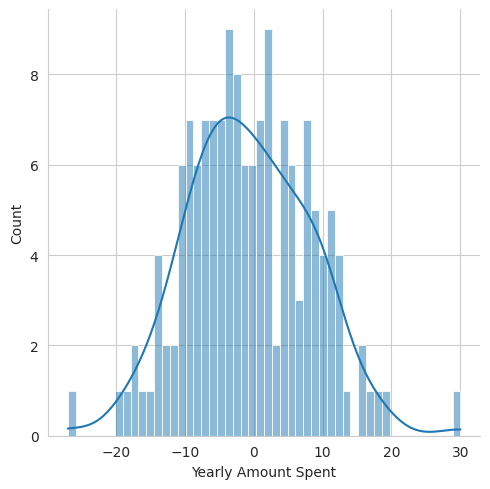

In [ ]:
sns.displot(data=(y_test - predictions), bins=50, kde=True)

Residuals are the differences between the actual observed values and the values predicted by a regression model. The distribution of residuals is used to assess how well the model fits the data.

The histogram of residuals, with a Kernel Density Estimate (KDE) curve overlaid, suggests that the residuals are approximately normally distributed. This is generally a desired feature for a good regression model, as residuals are expected to represent random and unpredictable variations.

The peak of the histogram is centered around zero, indicating that most residuals are close to zero. This means that the model makes accurate predictions for most cases.



## **Thank you for reviewing my work.**